<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# **Boston Housing Data - Descriptive Statistics, Visualizations and Tests**

### Import the required libraries we need for the lab.


In [144]:
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import scipy.stats

### Read the dataset in the csv file from the URL


In [145]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [146]:
boston_df.to_csv('housing-prices.csv')

### Task 1: Become familiar with the dataset

In [147]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [148]:
boston_df = boston_df.drop(['Unnamed: 0'], axis=1)

The following describes the dataset variables:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

### Task 2: Generate Descriptive Statistics and Visualizations

In [149]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [150]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [151]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [152]:
boston_df.shape

(506, 13)

In [153]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [154]:
boston_df['MEDV'].median()

21.2

#### Task : For the "Median value of owner-occupied homes" provide a boxplot.
#### Explanation : The boxplot visualizes the median value of owner-occupied homes.

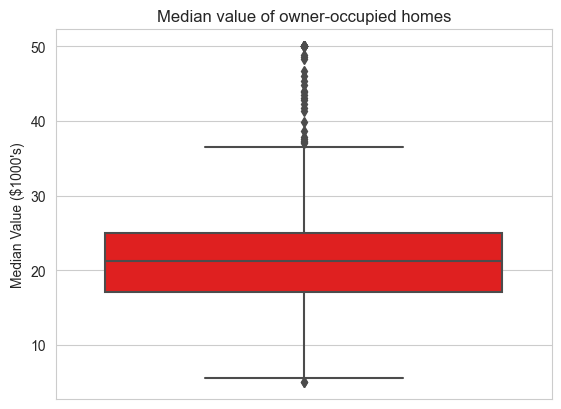

In [155]:
ax = sns.boxplot(y="MEDV", data=boston_df, color='red')
sns.set_style("whitegrid")
plt.title("Median value of owner-occupied homes")
plt.ylabel("Median Value ($1000's)")
plt.show()

#### Task : Provide a bar plot for the Charles river variable.
#### Explanation : The barplot visualizes the charles river variable and shows the number of houses that are bounded by the charles river (1) and the number of houses that are not bounded by the charles river (0).

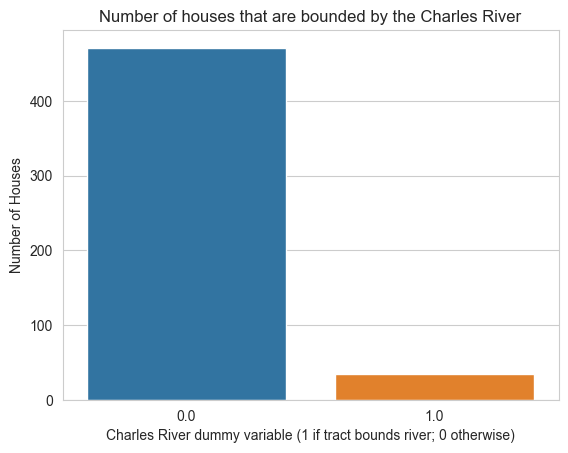

In [156]:
ax = sns.countplot(data=boston_df, x='CHAS')
plt.title("Number of houses that are bounded by the Charles River")
plt.ylabel("Number of Houses")
plt.xlabel("Charles River dummy variable (1 if tract bounds river; 0 otherwise)")
plt.show()

#### Task : Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
#### Explanation : As we move from the young age group to the older age group, the median value increases.

[Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, "Median Value ($1000's)"),
 Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')]

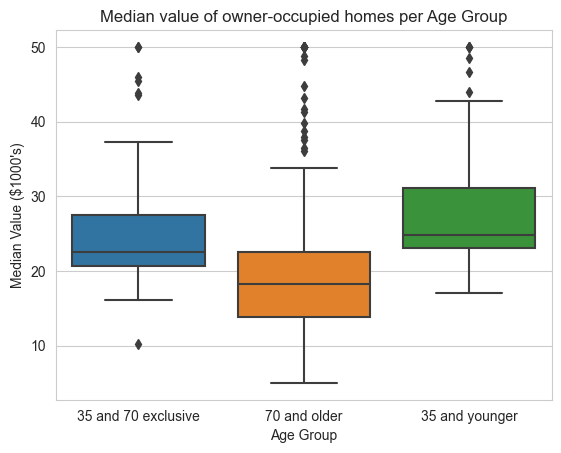

In [157]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = '35 and 70 exclusive'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 and older'

boxplt = sns.boxplot(y = 'MEDV', x = 'AGE_GROUP', data = boston_df)
boxplt.set(xlabel='Age Group', ylabel="Median Value ($1000's)", title='Median value of owner-occupied homes per Age Group')

#### Task : Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
#### Explanation : Where there are fewer non-retail business acres per town, the nitric oxide concentrations are lower.

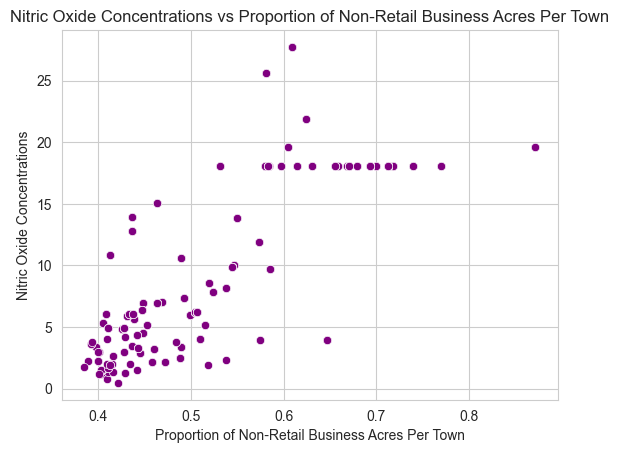

In [158]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='purple')
plt.title("Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres Per Town")
plt.ylabel("Nitric Oxide Concentrations")
plt.xlabel("Proportion of Non-Retail Business Acres Per Town")
plt.show()

#### Task : Create a histogram for the pupil to teacher ratio variable.
#### Explanation : 20-21 is the most frequent ratio.

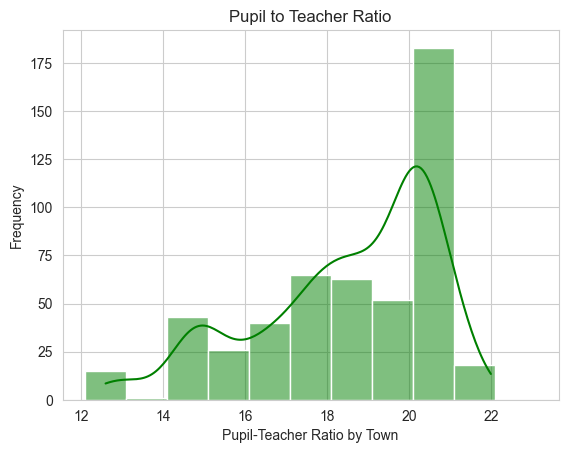

In [159]:
sns.histplot(data=boston_df, x='PTRATIO', color='green', kde=True, discrete=True)
plt.title("Pupil to Teacher Ratio")
plt.ylabel("Frequency")
plt.xlabel("Pupil-Teacher Ratio by Town")
plt.show()

### Task 3: Use the appropriate tests to answer the questions provided.

In [160]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35 and 70 exclusive
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35 and 70 exclusive
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35 and 70 exclusive
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35 and 70 exclusive


In [161]:
# Be sure to:
# 1.	State your hypothesis.
# 2.	Use α = 0.05
# 3.	Perform the test Statistics.
# 4.	State the conclusion from the test.

#### Task : Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#### Hypothesis
- Null Hypothesis (H0) : There is no significant difference in median value of houses bounded by the Charles River and those that are not bounded.
- Alternative Hypothesis (HA) : There is a significant difference in median value of houses bounded by the Charles River and those that are not bounded.
#### Conclusion
- The p-value (0.003567170098137517) is less than (α = 0.05) so we will reject the null hypothesis. As a result, there is a significant difference in median value of houses bounded by the Charles River and those that are not bounded.

In [162]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

#### Task : Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#### Hypothesis
- Null Hypothesis (H0) : There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.
- Alternative Hypothesis (HA) : There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.
#### Conclusion
- The p-value (1.7105011022702984e-15) is less than (α = 0.05) so we will reject the null hypothesis. As a result, there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

In [163]:
first_group = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
second_group = boston_df[boston_df['AGE_GROUP'] == '35 and 70 exclusive']['MEDV']
third_group = boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']
f_oneway(first_group, second_group, third_group)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

#### Task : Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#### Hypothesis
- Null Hypothesis (H0) : There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
- Alternative Hypothesis (HA) : There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
#### Conclusion
- The p-value (7.065041586253742e-24) is less than (α = 0.05) so we will reject the null hypothesis. As a result, there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [164]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['MEDV'])

PearsonRResult(statistic=-0.42732077237328253, pvalue=7.065041586253742e-24)

#### Task : What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value (MEDV) of owner occupied homes? (Regression analysis)
#### Hypothesis
- Null Hypothesis (H0) : There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
- Alternative Hypothesis (HA) : There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
#### Conclusion
- The p-value (0.000) is less than (α = 0.05) so we will reject the null hypothesis. As a result, there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
#### Coefficient Value and Explanation
- R-squared:	0.062 which means 6.2% of the MEDV variation is explained by DIS.
- For DIS, the coefficient is  1.0916 which means that as distance increases by one unit, the median value increases by 1.09 units.
- As the R-squared is low, this means other factors play a bigger role in the price of houses.

In [165]:
x = boston_df[['DIS']]
y = boston_df[['MEDV']]
x = sm.add_constant(x)
m = sm.OLS(y, x).fit()

In [166]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        17:30:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0